<a href="https://colab.research.google.com/github/rdwnhadi/LearningDataScience/blob/main/Latihan_Time_Series_dengan_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [20]:
data_train = pd.read_csv('1.csv')
data_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [21]:
data_train.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

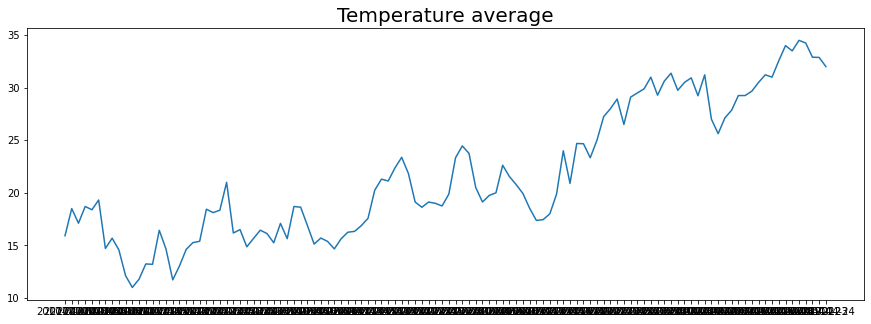

In [22]:
dates = data_train['date'].values
temp  = data_train['meantemp'].values
 
 
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average',
          fontsize=20);

In [23]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [25]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [26]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 26.4848 - mae: 26.9848
Epoch 2/100
1/1 [==============================] - 0s 88ms/step - loss: 26.4356 - mae: 26.9356
Epoch 3/100
1/1 [==============================] - 0s 97ms/step - loss: 26.3993 - mae: 26.8993
Epoch 4/100
1/1 [==============================] - 0s 112ms/step - loss: 26.3983 - mae: 26.8983
Epoch 5/100
1/1 [==============================] - 0s 92ms/step - loss: 26.3972 - mae: 26.8972
Epoch 6/100
1/1 [==============================] - 0s 100ms/step - loss: 26.3955 - mae: 26.8955
Epoch 7/100
1/1 [==============================] - 0s 97ms/step - loss: 26.3933 - mae: 26.8933
Epoch 8/100
1/1 [==============================] - 0s 101ms/step - loss: 26.3905 - mae: 26.8905
Epoch 9/100
1/1 [==============================] - 0s 96ms/step - loss: 26.3874 - mae: 26.8874
Epoch 10/100
1/1 [==============================] - 0s 92ms/step - loss: 26.3840 - mae: 26.8840
Epoch 11/100
1/1 [==============================